C:\Users\Shree\AppData\Local\Temp\ipykernel_20660\4286302645.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_punjab[f'lag_{lag}'] = df_punjab['Punjab'].shift(lag)
C:\Users\Shree\AppData\Local\Temp\ipykernel_20660\4286302645.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_punjab[f'lag_{lag}'] = df_punjab['Punjab'].shift(lag)
C:\Users\Shree\AppData\Local\Temp\ipykernel_20660\4286302645.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Mean Squared Error (MSE): 846.6527273899991
Mean Absolute Error (MAE): 15.57426999999999
R-squared (R²): 0.8035727564249957


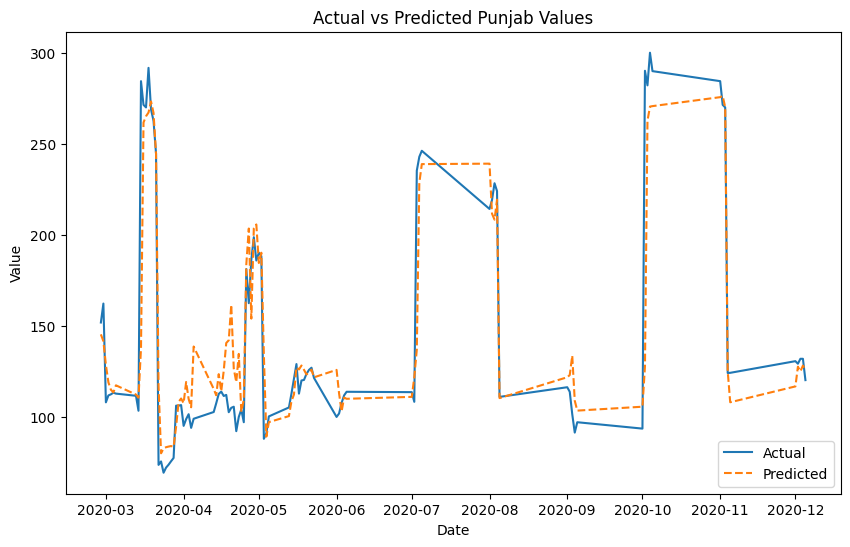

c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid fea

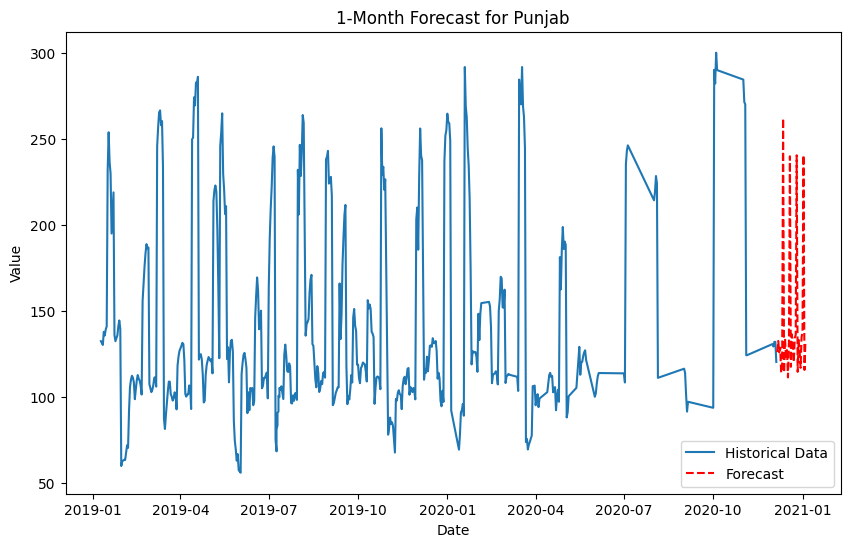

Forecast for the next 30 days:
            Forecast
2020-12-06   126.125
2020-12-07   132.624
2020-12-08   126.036
2020-12-09   128.693
2020-12-10   114.140
2020-12-11   114.914
2020-12-12   261.959
2020-12-13   114.242
2020-12-14   134.069
2020-12-15   122.148
2020-12-16   127.855
2020-12-17   111.441
2020-12-18   131.895
2020-12-19   239.836
2020-12-20   117.597
2020-12-21   136.473
2020-12-22   130.239
2020-12-23   120.298
2020-12-24   134.290
2020-12-25   136.153
2020-12-26   240.442
2020-12-27   114.672
2020-12-28   133.202
2020-12-29   126.834
2020-12-30   117.008
2020-12-31   134.579
2021-01-01   138.429
2021-01-02   240.501
2021-01-03   115.790
2021-01-04   132.264


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load dataset into pandas dataframe (Using same data for brevity)
df = pd.read_csv('C:/Users/Shree/Desktop/dataset_tk.csv')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Example using 'Punjab' for forecasting. We can apply it to others in a similar way
df_punjab = df[['Punjab']]

# Create lag features (previous days' values) to introduce temporal dependence
for lag in range(1, 8):  # Using the last 7 days as features
    df_punjab[f'lag_{lag}'] = df_punjab['Punjab'].shift(lag)

# Drop missing values due to shifting
df_punjab.dropna(inplace=True)

# Split into features (X) and target (y)
X = df_punjab.drop('Punjab', axis=1)
y = df_punjab['Punjab']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Punjab Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Forecast future values for the next 30 days
future_steps = 30
last_known_data = df_punjab.iloc[-1, 1:].values.reshape(1, -1)  # Last known lag features

forecast_dates = pd.date_range(start=df_punjab.index[-1] + pd.Timedelta(days=1), periods=future_steps)
forecast_values = []

for _ in range(future_steps):
    next_pred = rf.predict(last_known_data)
    forecast_values.append(next_pred[0])
    
    # Update lag features for the next prediction
    last_known_data = np.roll(last_known_data, -1)  # Shift lag features
    last_known_data[0, -1] = next_pred[0]  # Add new prediction to the last lag

# Create a DataFrame to hold the forecasted results
forecast_df = pd.DataFrame(forecast_values, index=forecast_dates, columns=['Forecast'])

# Plot forecasted values for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(df_punjab.index, df_punjab['Punjab'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--',color='red')
plt.title('1-Month Forecast for Punjab')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display forecasted values
print(f"Forecast for the next {future_steps} days:")
print(forecast_df)


Mean Squared Error (MSE): 846.6527273899991
Mean Absolute Error (MAE): 15.57426999999999
R-squared (R²): 0.8035727564249957


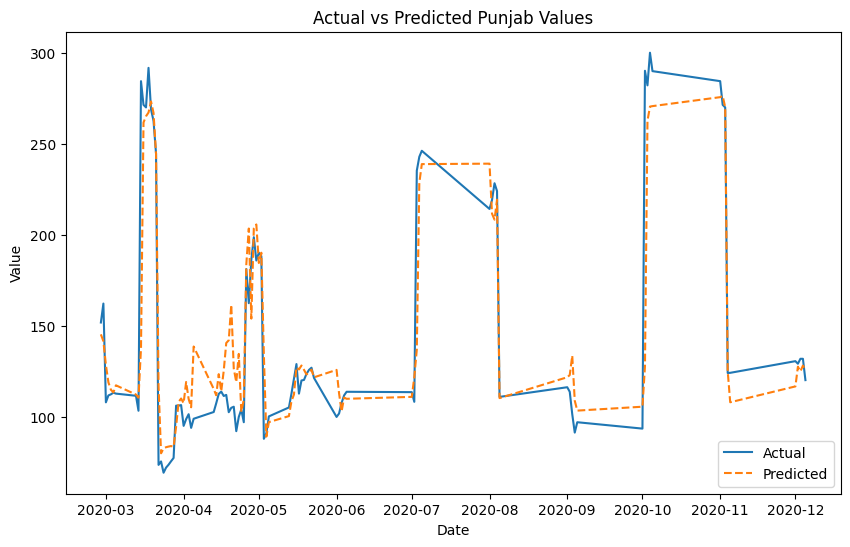

c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid fea

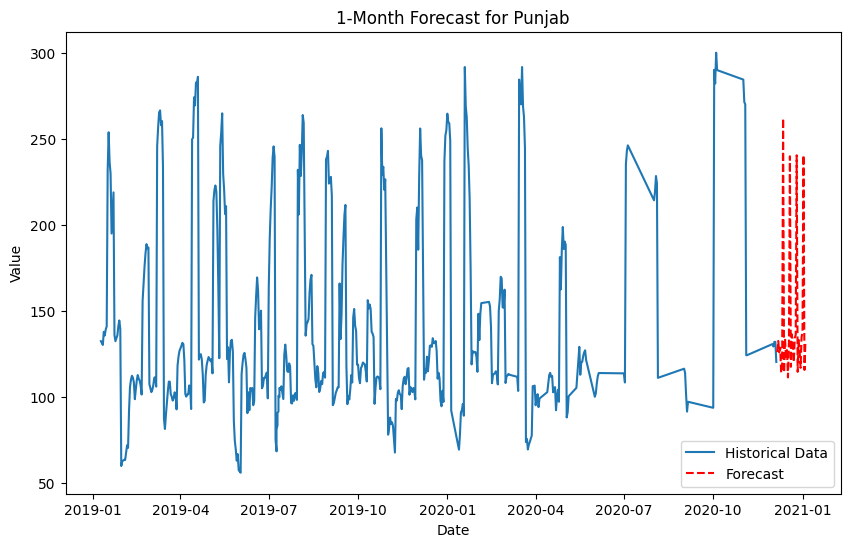

Forecast for the next 30 days:
            Forecast
2020-12-06   126.125
2020-12-07   132.624
2020-12-08   126.036
2020-12-09   128.693
2020-12-10   114.140
2020-12-11   114.914
2020-12-12   261.959
2020-12-13   114.242
2020-12-14   134.069
2020-12-15   122.148
2020-12-16   127.855
2020-12-17   111.441
2020-12-18   131.895
2020-12-19   239.836
2020-12-20   117.597
2020-12-21   136.473
2020-12-22   130.239
2020-12-23   120.298
2020-12-24   134.290
2020-12-25   136.153
2020-12-26   240.442
2020-12-27   114.672
2020-12-28   133.202
2020-12-29   126.834
2020-12-30   117.008
2020-12-31   134.579
2021-01-01   138.429
2021-01-02   240.501
2021-01-03   115.790
2021-01-04   132.264


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load dataset into pandas dataframe (Using same data for brevity)
df = pd.read_csv('C:/Users/Shree/Desktop/dataset_tk.csv')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Example using 'Punjab' for forecasting. We can apply it to others in a similar way
df_punjab = df[['Punjab']].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Create lag features (previous days' values) to introduce temporal dependence
for lag in range(1, 8):  # Using the last 7 days as features
    df_punjab.loc[:, f'lag_{lag}'] = df_punjab['Punjab'].shift(lag)

# Drop missing values due to shifting
df_punjab = df_punjab.dropna()  # Assign the result back to df_punjab

# Split into features (X) and target (y)
X = df_punjab.drop('Punjab', axis=1)
y = df_punjab['Punjab']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Punjab Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Forecast future values for the next 30 days
future_steps = 30
last_known_data = df_punjab.iloc[-1, 1:].values.reshape(1, -1)  # Last known lag features

forecast_dates = pd.date_range(start=df_punjab.index[-1] + pd.Timedelta(days=1), periods=future_steps)
forecast_values = []

for _ in range(future_steps):
    next_pred = rf.predict(last_known_data)
    forecast_values.append(next_pred[0])
    
    # Update lag features for the next prediction
    last_known_data = np.roll(last_known_data, -1)  # Shift lag features
    last_known_data[0, -1] = next_pred[0]  # Add new prediction to the last lag

# Create a DataFrame to hold the forecasted results
forecast_df = pd.DataFrame(forecast_values, index=forecast_dates, columns=['Forecast'])

# Plot forecasted values for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(df_punjab.index, df_punjab['Punjab'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--', color='red')
plt.title('1-Month Forecast for Punjab')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display forecasted values
print(f"Forecast for the next {future_steps} days:")
print(forecast_df)
